In [10]:
%load_ext autoreload
%autoreload 2

import MAIA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
acquisitions=[
    
'20211201_MouseBrain2_S11_306x248_Att30_25um',
'20211202_MouseBrain2_S12_332x246_Att30_25um',
'20211203_MouseBrain2_S13_319x262_Att30_25um',
'20211206_MouseBrain2_S14_354x299_Att30_25um',
'20211209_MouseBrain2_S15_359x281_Att30_25um',
'20220127_MouseBrain2_S16_398x303_Att30_25um',
'20220105_MouseBrain2_S17_395x294_Att32_25um',
'20220106_MouseBrain2_S18_393x309_Att32_25um',
'20211210_MouseBrain2_S19_423x320_Att32_25um',
'20220321_MouseBrain2_S20_Duplicate_443x313_Att30_25um',
'20211213_MouseBrain2_S21_412x360_Att30_25um',
'20220107_MouseBrain2_S22_417x310_Att32_25um',
'20220224_MouseBrain2_S23_427x319_Att30_25um',
'20220115_MouseBrain2_S24_427x322_Att30_25um',
'20220311_MouseBrain2_S25_duplicate_476x336_Att30_25um',
'20220120_MouseBrain2_S26_415x315_Att30_25um',
'20220122_MouseBrain2_S27_443x301_Att30_25um',
'20220125_MouseBrain2_S28_312x431_Att30_25um',
'20220126_MouseBrain2_S29_410x290_Att30_25um',
'20220111_MouseBrain2_S30_400x248_Att32_25um',
'20220124_MouseBrain2_S31_394x261_Att30_25um',
'20220130_MouseBrain2_S32_370x325_Att30_25um',
'20220201_MouseBrain2_S33_359x314_Att30_25um',
'20220203_MouseBrain2_S34_377x322_Att30_25um',
'20220210_MouseBrain2_S36_363x307_Att30_25um',
'20220207_MouseBrain2_S35_375x344_Att30_25um' ,
'20220213_MouseBrain2_S37_354x308_Att30_25um',
'20220216_MouseBrain2_S38_363x304_Att30_25um',
'20220225_MouseBrain2_S39_354x296_Att30_25um',
'20220308_MouseBrain2_S40_322x290_Att30_25um',
'20220303_MouseBrain2_S41_333x262_Att30_25um',
'20220222_MouseBrain2_S42_278x251_Att30_25um'    
]

NAME_FOLDER = '06062023_lipids'
PATH_DATA = f'/data/SV_DAngelo/Hannah/processedData/LBA/brain2/{NAME_FOLDER}'
PATH_MASKS = f'/data/SV_DAngelo/Hannah/processedData/LBA/brain2/masks'

In [3]:
x, masks = MAIA.utils.tools.read_images_masks(acquisitions,
                                        path_images=PATH_DATA, path_masks=PATH_MASKS,
                                        gaussian_smoothing=False, gaussian_sigma=0.3,
                                        log_transform=True, epsilon=0.0002
                                       )

Loading Data...: 202it [06:16,  1.87s/it]

Data Loaded Successfully.


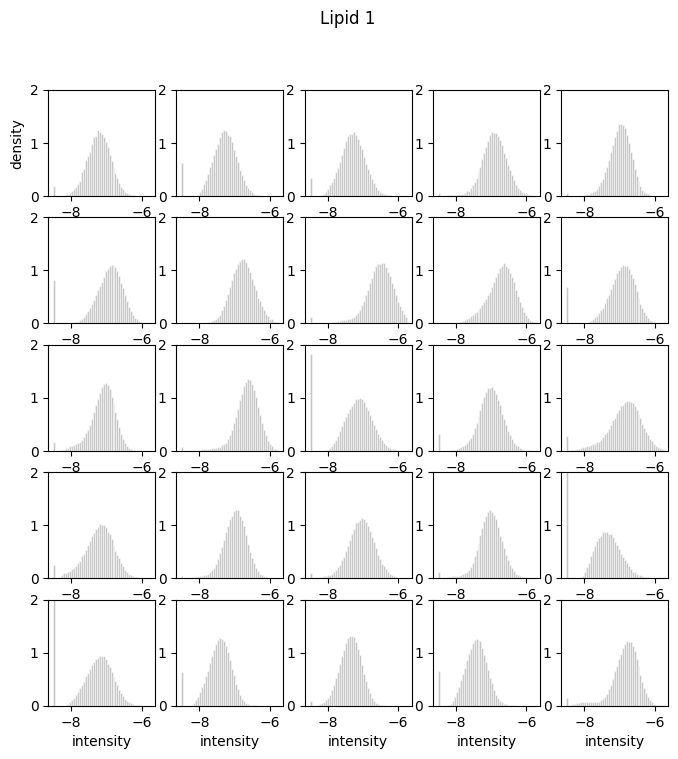

In [4]:
MAIA.vis.plot_intensity(x[:, :25, :], masks[:, :25, :], v=1, mz_val='Lipid 1')

In [5]:
init_state = MAIA.norm.initialize(x, masks, visualize=False, subsample=True)

GMM Initialization: 100%|██████████████████████████████████████████████████| 202/202 [00:19<00:00, 10.52it/s]
2023-09-15 18:17:44.457281: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.2.140). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [6]:
import jax.numpy as jnp
COVARIATE_VECTOR = jnp.array([0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,
                              0,0
                             ])

In [7]:
svi_result = MAIA.norm.normalize(x, 
                              masks,
                              init_state=init_state,
                              subsample=True,
                              num_steps=5000,
                              covariate_vector=COVARIATE_VECTOR,
                              )

100%|███| 5000/5000 [00:08<00:00, 585.30it/s, init loss: 25418448.0000, avg. loss [4751-5000]: -2772834.0000]


In [8]:
x_tran = MAIA.norm.transform(x, masks, svi_result)

molecule susceptibility: 0.63


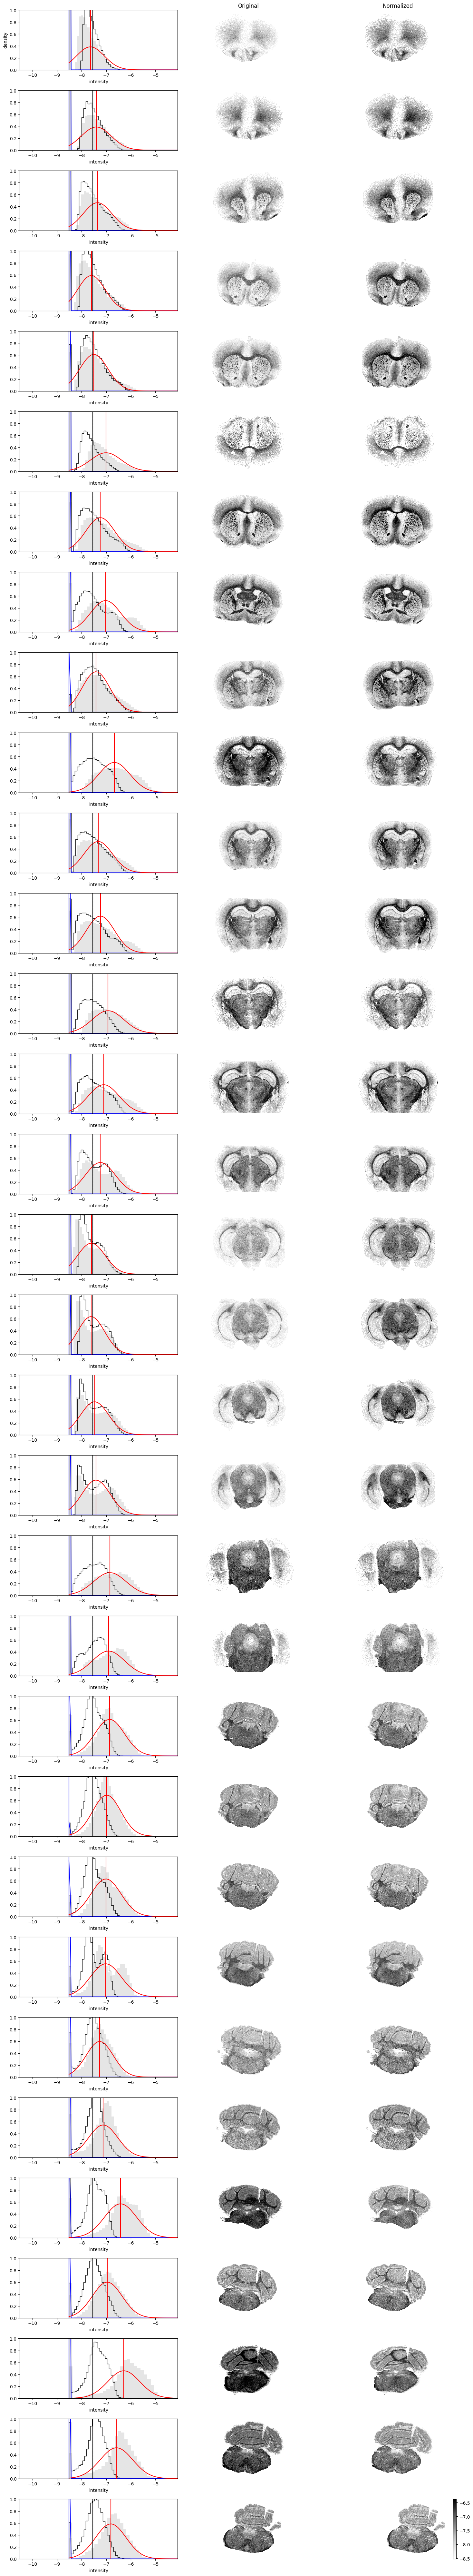

In [12]:
MAIA.vis.normalized_hist(x_tran, x, masks, svi_result, acquisitions, v=5)